In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Get the data

In [6]:
# Load the saved array - gives Boost(i = sample point, z, k)
Bk_arr = np.load('Boost.npy')
print(Bk_arr.shape)

(50, 51, 768)


In [7]:
# extract data from text file - gives z and k arrays
txt_arr = np.loadtxt("z_k.txt")

z_arr = np.array(txt_arr.T[0][np.isfinite(txt_arr.T[0])])
k_arr = np.array(txt_arr.T[1])

print(z_arr.shape)
print(k_arr.shape)

(51,)
(768,)


In [8]:
# exclude GR point

exclude = 35
Bk_arr = np.delete(Bk_arr, exclude, axis=0)
     


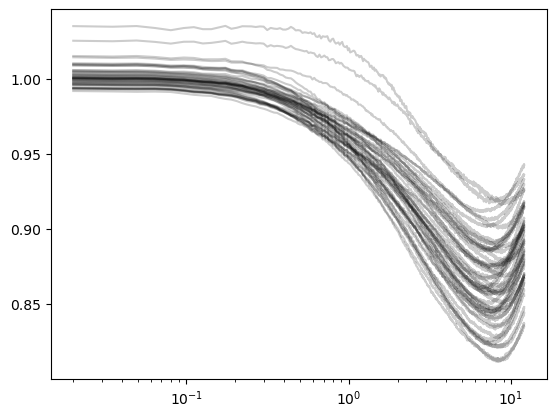

In [9]:
# Plot data

z_index = 12

plt.figure(32)
for sim_index in range(49):
    plt.plot(k_arr, Bk_arr[sim_index, z_index, :], 'k', alpha=0.2)
    
    
plt.xscale('log')
plt.show()
     


In [10]:
# Get the parameter - for now assume only one parameter, w_m
txt = "cosmo_newdesign"
hcube = np.loadtxt(txt).T
f_phi = np.delete(hcube[4], exclude, axis=0)
E_dS = np.delete(hcube[3], exclude, axis=0)
wm = np.delete(hcube[0], exclude, axis=0)
theta = np.array([wm,f_phi])

"""
n_s = np.delete(hcube[1], exclude, axis=0)
A_s = np.delete(hcube[2], exclude, axis=0)
"""
""" h = 0.67
    wb = 0.0223
    wr = 4.28e-5
"""


' h = 0.67\n    wb = 0.0223\n    wr = 4.28e-5\n'

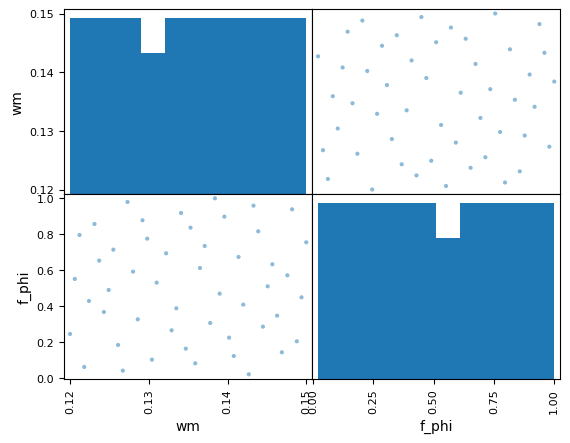

In [11]:
df_theta = pd.DataFrame(theta.T, columns=['wm','f_phi'])
pd.plotting.scatter_matrix(df_theta)
plt.show()


## standardization transformation

In [12]:
## TODO: understand if this is the transformation to do instead. Then, the Usvd should be used
# The mean and standard deviations are computed collectively for all the 50 cosmological models
"""
theta = (f_phi - np.mean(f_phi))/np.std(f_phi)
print(theta.shape)

# function of k, for now only z = 0
chi = np.ndarray.flatten(Bk_arr[:, 0, :])

print(np.all(chi[:768] == Bk_arr[0, 0, :])==True)

chi = (chi - np.mean(chi))/np.std(chi)

chi = chi.T.reshape((49, 768))

print(chi.shape)

# this plot shows the mean is at zero for all k
for i in range(len(k_arr)):
    plt.scatter(theta, chi.T[i], color="k", alpha = 0.1)
    plt.scatter(np.mean(theta), np.mean(chi.T[i]), color = "b")

plt.scatter(np.mean(theta), np.mean(chi), color = "r")

plt.xlabel(r"$\theta$ (normalized $\omega_m$)")
plt.ylabel(r"$\chi(k)$ (normalized $P(k, z=0)$)")

plt.show()
"""

'\ntheta = (f_phi - np.mean(f_phi))/np.std(f_phi)\nprint(theta.shape)\n\n# function of k, for now only z = 0\nchi = np.ndarray.flatten(Bk_arr[:, 0, :])\n\nprint(np.all(chi[:768] == Bk_arr[0, 0, :])==True)\n\nchi = (chi - np.mean(chi))/np.std(chi)\n\nchi = chi.T.reshape((49, 768))\n\nprint(chi.shape)\n\n# this plot shows the mean is at zero for all k\nfor i in range(len(k_arr)):\n    plt.scatter(theta, chi.T[i], color="k", alpha = 0.1)\n    plt.scatter(np.mean(theta), np.mean(chi.T[i]), color = "b")\n\nplt.scatter(np.mean(theta), np.mean(chi), color = "r")\n\nplt.xlabel(r"$\theta$ (normalized $\\omega_m$)")\nplt.ylabel(r"$\\chi(k)$ (normalized $P(k, z=0)$)")\n\nplt.show()\n'

(2, 49)
(49, 768)


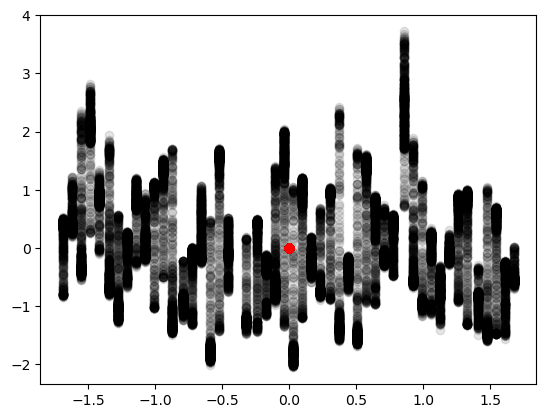

In [20]:
 # If the mean and std were computed for each cosmo model

theta[0] = (theta[0] - np.mean(theta[0]))/np.std(theta[0])
theta[1] = (theta[1] - np.mean(theta[1]))/np.std(theta[1])

print(theta.shape)

# function of k, for now only z = 0
chi = (Bk_arr[:, 0, :] - np.mean(Bk_arr[:, 0, :], axis=0))/np.std(Bk_arr[:, 0, :], axis=0)

print(xi.shape)

# this plot shows the mean is at zero for all k
for i in range(len(k_arr)):
    plt.scatter(theta[0], xi.T[i], color="k", alpha = 0.1)
    plt.scatter(np.mean(theta[0]), np.mean(xi.T[i]), color = "r")

plt.show()

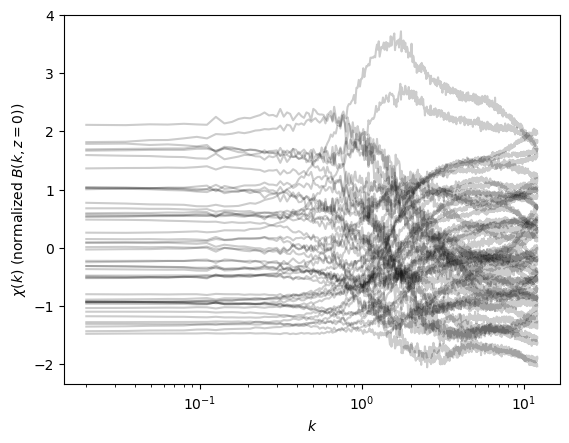

In [21]:
plt.figure(32)
for i in range(49):
    plt.plot(k_arr, chi[i], 'k', alpha=0.2)
   
plt.xscale('log')
plt.xlabel(r"$k$")
plt.ylabel(r"$\chi(k)$ (normalized $B(k, z=0)$)")

plt.show()

## Apply PCA

In [22]:
#TEST: Perform PCA with numpy.linalg.svd

Usvd, s, vh = np.linalg.svd(chi.T, full_matrices=True)

Usvd = Usvd.T

print("eigenvalues = ", s)

print("shape U = ", Usvd.shape)
print("shape sigma = ", s.shape)
print("shape V_transpose = ", vh.shape)

eigenvalues =  [1.79132880e+02 7.09578447e+01 1.75531842e+01 1.09436504e+01
 4.02776711e+00 3.03067450e+00 2.62740004e+00 2.41504173e+00
 2.16487989e+00 1.96919700e+00 1.89310845e+00 1.83555525e+00
 1.70296060e+00 1.42652722e+00 1.33447246e+00 1.31680981e+00
 1.22368109e+00 1.15517911e+00 1.10753593e+00 1.08146341e+00
 1.03628632e+00 9.81781542e-01 9.53966592e-01 9.08056513e-01
 8.75103302e-01 8.22881190e-01 8.07958538e-01 7.77358465e-01
 7.52533825e-01 7.26222433e-01 7.17286882e-01 6.93058672e-01
 6.71092753e-01 6.55374193e-01 6.28941286e-01 6.11538566e-01
 5.87938599e-01 5.66635265e-01 5.43713307e-01 5.20869624e-01
 5.17297952e-01 5.09887459e-01 4.86653093e-01 4.82671165e-01
 4.63871233e-01 4.42361430e-01 4.13329045e-01 3.94595343e-01
 1.79740673e-12]
shape U =  (768, 768)
shape sigma =  (49,)
shape V_transpose =  (49, 49)


In [23]:
#TEST: Perform PCA with sklearn (Choose n_components to keep)
pca = PCA()

# Apply sklearn PCA method
sklearn_PCA = pca.fit(chi)

# Find vectors in direction of PCs (normalized ,positive)
PCAs_vects_sklearn = sklearn_PCA.components_
print("PCA eigenvector array size = ", PCAs_vects_sklearn.shape)

# Find eigenvalues for each PC
PCAs_eigenvals_sklearn = sklearn_PCA.singular_values_

print("eigenvalues = ", PCAs_eigenvals_sklearn)
#find PC vectors with eigenvalues as norm

Usklearn = np.matmul(np.diag(PCAs_eigenvals_sklearn), np.matrix(PCAs_vects_sklearn))

print("PCA norm eigenvector array size = ",Usklearn.shape)

PCA eigenvector array size =  (49, 768)
eigenvalues =  [1.79132880e+02 7.09578447e+01 1.75531842e+01 1.09436504e+01
 4.02776711e+00 3.03067450e+00 2.62740004e+00 2.41504173e+00
 2.16487989e+00 1.96919700e+00 1.89310845e+00 1.83555525e+00
 1.70296060e+00 1.42652722e+00 1.33447246e+00 1.31680981e+00
 1.22368109e+00 1.15517911e+00 1.10753593e+00 1.08146341e+00
 1.03628632e+00 9.81781542e-01 9.53966592e-01 9.08056513e-01
 8.75103302e-01 8.22881190e-01 8.07958538e-01 7.77358465e-01
 7.52533825e-01 7.26222433e-01 7.17286882e-01 6.93058672e-01
 6.71092753e-01 6.55374193e-01 6.28941286e-01 6.11538566e-01
 5.87938599e-01 5.66635265e-01 5.43713307e-01 5.20869624e-01
 5.17297952e-01 5.09887459e-01 4.86653093e-01 4.82671165e-01
 4.63871233e-01 4.42361430e-01 4.13329045e-01 3.94595343e-01
 7.95509791e-14]
PCA norm eigenvector array size =  (49, 768)


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

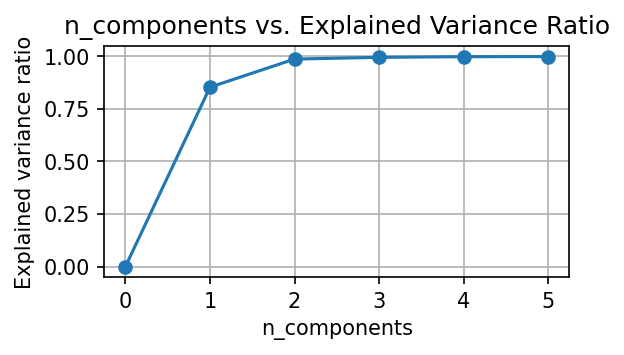

In [24]:
nums = np.arange(6)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(chi)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

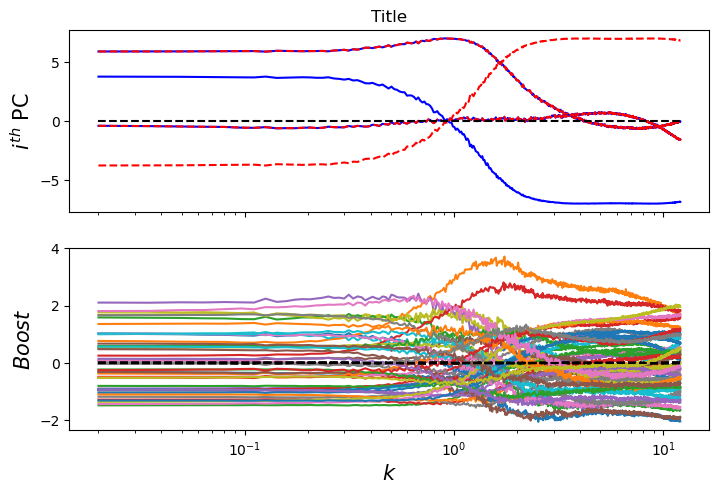

In [25]:
"""Plot PCA components as a function of k"""

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False,figsize=(8, 5))

for i in range(3):
    ax1.plot(k_arr, np.matmul(np.diag(s), Usvd[:49])[i], color = "b")
    ax1.plot(k_arr, np.array(Usklearn[i])[0], color = "r", linestyle="--")
    
ax1.plot(k_arr, np.zeros(len(k_arr)), "k--")



ax1.set_ylabel(r'$i^{th}$ PC', size = 15)
ax1.set_title("Title")
plt.xscale("log")


for i in range(49):
    ax2.plot(k_arr,chi[i])
    ax2.plot(k_arr, np.zeros(len(k_arr)), "k--")

ax2.set_ylabel(r'$Boost$', size = 15)
ax2.set_xlabel(r'$k$', size = 15)


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)

ax1.set_xscale("log")


#plt.savefig('PCcompare.pdf' , bbox_inches='tight')
plt.show()


In [26]:
# Find the projections we want to emulate

w_theta = np.matmul(chi, Usvd[:3].T)
print(w_theta.shape)

(49, 3)


/home/c2042999/anaconda3/envs/DESC_Pittsprint/lib/python3.9/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


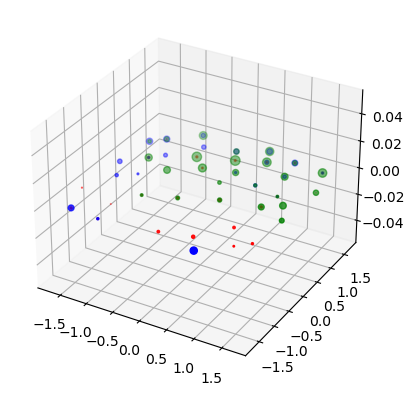

In [27]:
# Plot the projections
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.scatter(theta[0], theta[1], w_theta.T[2], marker="o", color="r")
plt.scatter(theta[0], theta[1], w_theta.T[1], marker="o", color="b")
plt.scatter(theta[0], theta[1], w_theta.T[0], marker="o", color="g")

/tmp/ipykernel_234519/3322312984.py:1: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = scipy.interpolate.interp2d(theta[0], theta[1], w_theta.T[2])
/tmp/ipykernel_234519/3322312984.py:5: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new

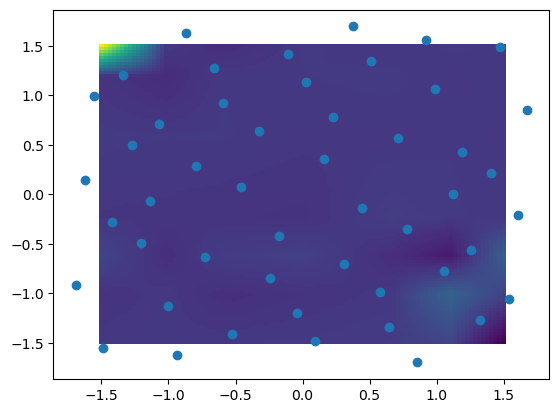

In [42]:
# Plot the projections
f = scipy.interpolate.interp2d(theta[0], theta[1], w_theta.T[2])

x,y = np.meshgrid(np.linspace(-1.5,1.5,100), np.linspace(-1.5,1.5,100))

plt.pcolormesh(x,y , f(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100)))

plt.scatter(theta[0], theta[1])

In [ ]:
plt.plot()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.scatter(theta[0], theta[1], w_theta.T[2], marker="o", color="r")
plt.scatter(theta[0], theta[1], w_theta.T[1], marker="o", color="b")
plt.scatter(theta[0], theta[1], w_theta.T[0], marker="o", color="g")

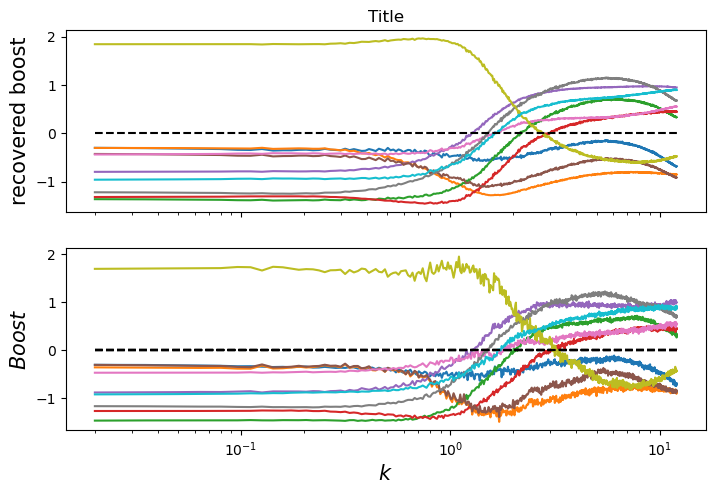

In [39]:
"""Recover boosts from PCA components"""

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False,figsize=(8, 5))

for i in range(10):
    ax1.plot(k_arr, np.matmul(w_theta, Usvd[:3])[i])
    
ax1.plot(k_arr, np.zeros(len(k_arr)), "k--")


ax1.set_ylabel(r'recovered boost', size = 15)
ax1.set_title("Title")
plt.xscale("log")


for i in range(10):
    ax2.plot(k_arr,chi[i])
    ax2.plot(k_arr, np.zeros(len(k_arr)), "k--")
    

ax2.set_ylabel(r'$Boost$', size = 15)
ax2.set_xlabel(r'$k$', size = 15)


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)


plt.show()


## Gaussian processes

In [40]:
# Define the Squared Exponential (SE) covariance function

def SE_kernel(xa, xb, standard_dev, lengthscale):
    
    """Exponentiated quadratic
    xa --> (n , 1), where n is the number of gaussian vectors (n points in function)
    xb --> (n , 1)
    standard_dev --> standard deviation of function
    lengthscale --> characteristic length scale"""
    
    # Squared of Euclidian distance [Dist_{a,b} = xa - xb]
    sq_norm = -0.5 * (scipy.spatial.distance.cdist(xa, xb, 'euclidean') **2 / lengthscale**2)
    return standard_dev**2 * np.exp(sq_norm)

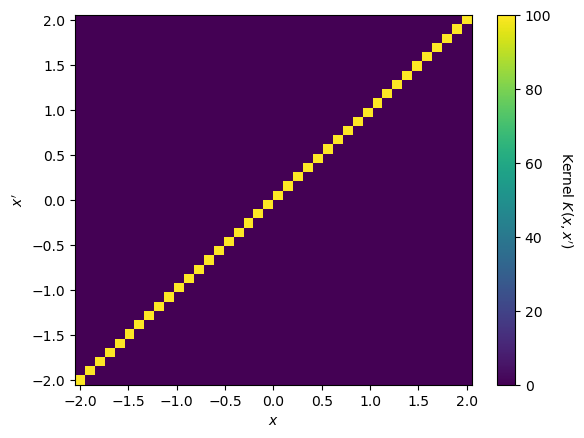

In [140]:
# EXAMPLE: Show the prior covariance. Remember this has mean f(x) = 0

# Sample from the Gaussian process distribution
n_of_samples = 40  # number of points in each function
sigma = 10
ell = 0.01
sigma_noise = 0.1

# Space to sample
X = np.expand_dims(np.linspace(-2, 2, n_of_samples), 1)
cov = SE_kernel(X, X, sigma, ell)  # Kernel of data points

#Create a meshgrid for the x and y axis
XX, YY = np.meshgrid(X, X)

plt.figure(dpi=100)
im = plt.pcolormesh(XX,YY,cov)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel(r"Kernel $K(x,x')$", rotation=-90, va="bottom")

plt.xlabel(r"$x$")
plt.ylabel(r"$x'$")

plt.show()

In [133]:
# EXAMPLE: Sample some functions from Gaussian process distribution
n_of_functions = 5  # Number of functions to sample

# Draw samples from the prior at our data points
# Assume mean of 0 for prior
ys = np.random.multivariate_normal(
    mean=np.zeros(n_of_samples), cov=cov, 
    size=n_of_functions)


Text(0.5, 0, 'x')

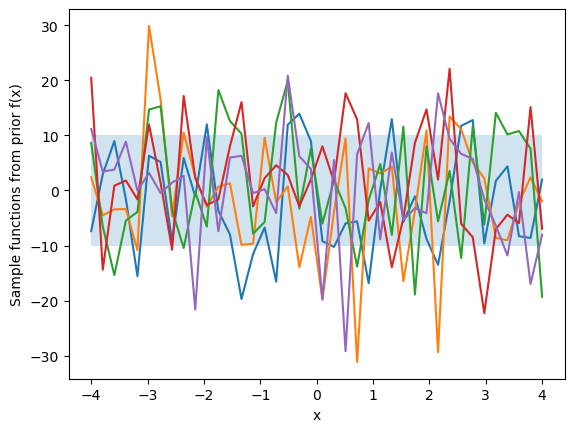

In [134]:
# EXAMPLE: Plot the sampled functions

for i in range(len(ys)):
    plt.plot(X, ys[i])

plt.fill_between(X.flatten(), -sigma, sigma, alpha=0.2)

plt.ylabel("Sample functions from prior f(x)")
plt.xlabel("x")

In [135]:
# EXAMPLE: To Do - find corner plot showing marginal Gaussians, dimensions (n x n)


In [136]:
# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    K11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    K12 = kernel_func(X1, X2)
    # Solve - returns (K11^-1 * K12)^T, assuming positive definite solutions
    solved = scipy.linalg.solve(K11, K12, assume_a='pos').T
    # Compute posterior mean
    mean2 = solved @ y1
    # Compute the posterior covariance
    K22 = kernel_func(X2, X2)
    K2 = K22 - (solved @ K12)
    return mean2, K2  # mean, covariance

In [137]:
# Gaussian process posterior with noisy obeservations
def GP_noise(X1, y1, X2, kernel_func, sigma_noise):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the noisy observations 
    (y1, X1), and the prior kernel function.
    """
    # Kernel of the noisy observations
    K11 = kernel_func(X1, X1) + ((sigma_noise ** 2) * np.eye(n1))
    # Kernel of observations vs to-predict
    K12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(K11, K12, assume_a='pos').T
    # Compute posterior mean
    mean2 = solved @ y1
    # Compute the posterior covariance
    K22 = kernel_func(X2, X2)
    K2 = K22 - (solved @ K12)
    return mean2, K2  # mean, covariance

In [138]:
# Compute the posterior mean and covariance

n1 = len(theta[0])  # Number of points to condition on (training points)
n2 = 41  # Number of points in posterior (test points)
ny = 5  # Number of functions that will be sampled from the posterior

## ONLY ONE VARIABLE (wm) AND ONE FUNCTION (the first weight)

# Sample observations (X1, y1) on the function 
X1 = theta[0].reshape(-1, 1)

y1 = w_theta.T[0].reshape(-1, 1)

# Predict points at uniform spacing to capture function
X2 = np.linspace(-2, 2, n2).reshape(-1, 1)

# Compute posterior mean and covariance
mean2, variance2 = GP_noise(X1, y1, X2, lambda x, y: SE_kernel(x, y, sigma, ell), 1)
# Compute the standard deviation at the test points to be plotted
stand_dev2 = np.sqrt(np.diag(variance2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mean2.T[0], cov=variance2, size=ny)

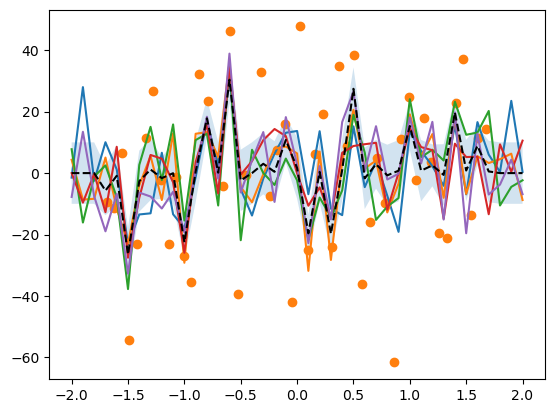

In [139]:
# EXAMPLE: plots for some sample posterior functions

for i in range(len(y2)):
    plt.plot(X2.flatten(), y2[i])
    
plt.plot(X2,mean2, "k--")
plt.fill_between(X2.flatten(), mean2.T[0]-stand_dev2, mean2.T[0]+stand_dev2, alpha=0.2)

plt.scatter(X1.flatten(),y1)

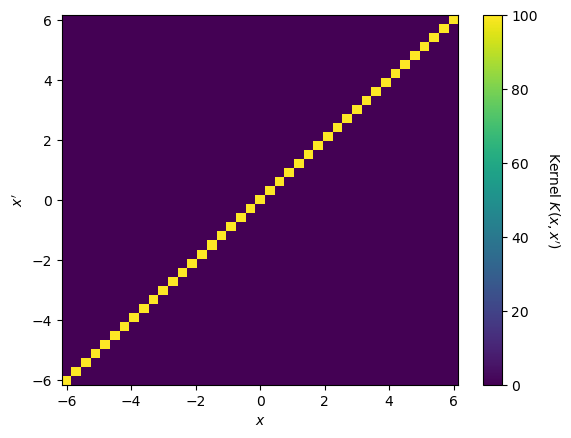

In [129]:
# EXAMPLE: Show the posterior covariance.

# Space to sample
X = np.expand_dims(np.linspace(-6, 6, n2), 1)

#Create a meshgrid for the x and y axis
XX, YY = np.meshgrid(X, X)

plt.figure(dpi=100)
im = plt.pcolormesh(XX,YY,variance2)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel(r"Kernel $K(x,x')$", rotation=-90, va="bottom")

plt.xlabel(r"$x$")
plt.ylabel(r"$x'$")

plt.show()